In [13]:
import sklearn
import numpy as np
import pandas as pd
import time
np.set_printoptions(edgeitems=10, linewidth=100)

In [309]:
train_data = pd.read_csv('./data/small_train_data.csv', index_col=0)
test_data = pd.read_csv('./data/small_test_data.csv', index_col=0)

# SGD

In [310]:
import ALSmodel
import importlib
importlib.reload(ALSmodel)

<module 'ALSmodel' from '/Users/timhsu/Documents/COURSES/DS1003/project/ALSmodel.py'>

In [74]:
params_n_factors = [100, 150, 250, 500]
lr = 0.0005

In [63]:
#params_train_scores = {}
#params_test_scores = {}

In [75]:
for n_factors in params_n_factors:
    print('n_factors = ', n_factors)
    sgd_model = ALSmodel.ALSRecommender(n_factors=n_factors, lr=lr, decay=0.98, method='sgd')
    sgd_model.prepare(train_data, test_data)
    train_scores = []
    test_scores = []
    epoch_per_iter = 5
    total_epoch = 500
    start = time.time()
    for it in range(int(total_epoch/epoch_per_iter)):
        if (it*epoch_per_iter)%20==0:
            print(it*epoch_per_iter, "th epoch.")
        if (it*epoch_per_iter > 250):
            lr = 0.0001
        sgd_model.fit(epoch_per_iter)
        train_scores.append(sgd_model.score(train_data))
        test_scores.append(sgd_model.score(test_data))
    params_train_scores[n_factors] = train_scores
    params_test_scores[n_factors] = test_scores
    print(time.time() - start)

n_factors =  100
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.
340 th epoch.
360 th epoch.
380 th epoch.
400 th epoch.
420 th epoch.
440 th epoch.
460 th epoch.
480 th epoch.
1551.559671163559
n_factors =  150
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.
340 th epoch.
360 th epoch.
380 th epoch.
400 th epoch.
420 th epoch.
440 th epoch.
460 th epoch.
480 th epoch.
1679.689775943756
n_factors =  250
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th 

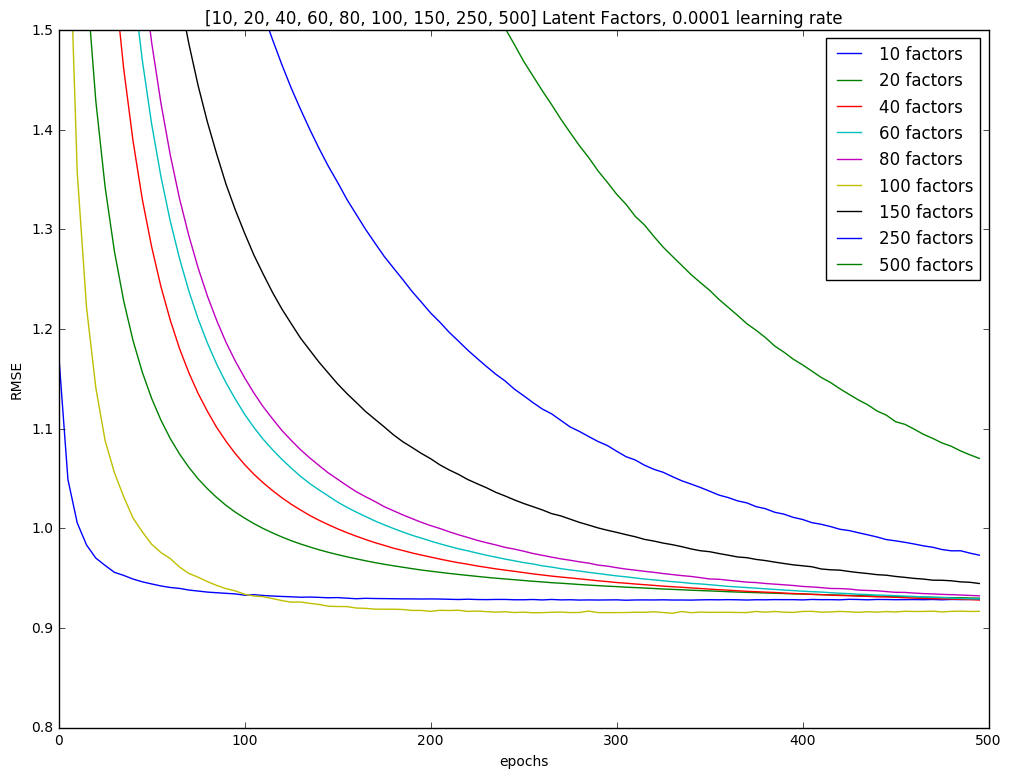

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,9))
for n_factors in sorted(list(params_train_scores.keys())):
    train_scores = params_train_scores[n_factors]
    #plt.plot(np.arange(len(train_scores))*epoch_per_iter, train_scores, label=('%d factors training' % n_factors))
    test_scores = params_test_scores[n_factors]
    plt.plot(np.arange(len(test_scores))*epoch_per_iter, test_scores, label=('%d factors' % n_factors))
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.ylim(0.80, 1.5)
plt.title('%s Latent Factors, %.4f learning rate' % (sorted(list(params_train_scores.keys())), lr))

In [192]:
pd.DataFrame(params_test_scores).min()

10     0.927731
20     0.929784
40     0.927961
60     0.929032
80     0.932129
100    0.914648
150    0.944516
250    0.972973
500    1.070073
dtype: float64

In [193]:
pd.DataFrame(params_train_scores).min()

10     0.884038
20     0.895883
40     0.891387
60     0.889007
80     0.886852
100    0.877664
150    0.881395
250    0.875412
500    0.854776
dtype: float64

## Regularization

In [187]:
params_lambda = [100, 10, 1, 0.1, 0.01]
lr = 0.0005

In [97]:
params_lambda_train = {}
params_lambda_test = {}

In [ ]:
for lambda_reg in params_lambda:
    print('lambda = ', lambda_reg)
    sgd_model = ALSmodel.ALSRecommender(n_factors=100, lr=lr, decay=0.98, method='sgd', lambda_reg=lambda_reg)
    sgd_model.prepare(train_data, test_data)
    train_scores = []
    test_scores = []
    epoch_per_iter = 5
    total_epoch = 500
    start = time.time()
    for it in range(int(total_epoch/epoch_per_iter)):
        if (it*epoch_per_iter)%20==0:
            print(it*epoch_per_iter, "th epoch.")
        if (it*epoch_per_iter > 250):
            lr = 0.0002
        sgd_model.fit(epoch_per_iter)
        train_scores.append(sgd_model.score(train_data))
        test_scores.append(sgd_model.score(test_data))
    params_lambda_train[lambda_reg] = train_scores
    params_lambda_test[lambda_reg] = test_scores
    print(time.time() - start)

lambda =  1
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.
340 th epoch.
360 th epoch.
380 th epoch.
400 th epoch.
420 th epoch.
440 th epoch.
460 th epoch.
480 th epoch.
1338.8378779888153
lambda =  0.1
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.
340 th epoch.


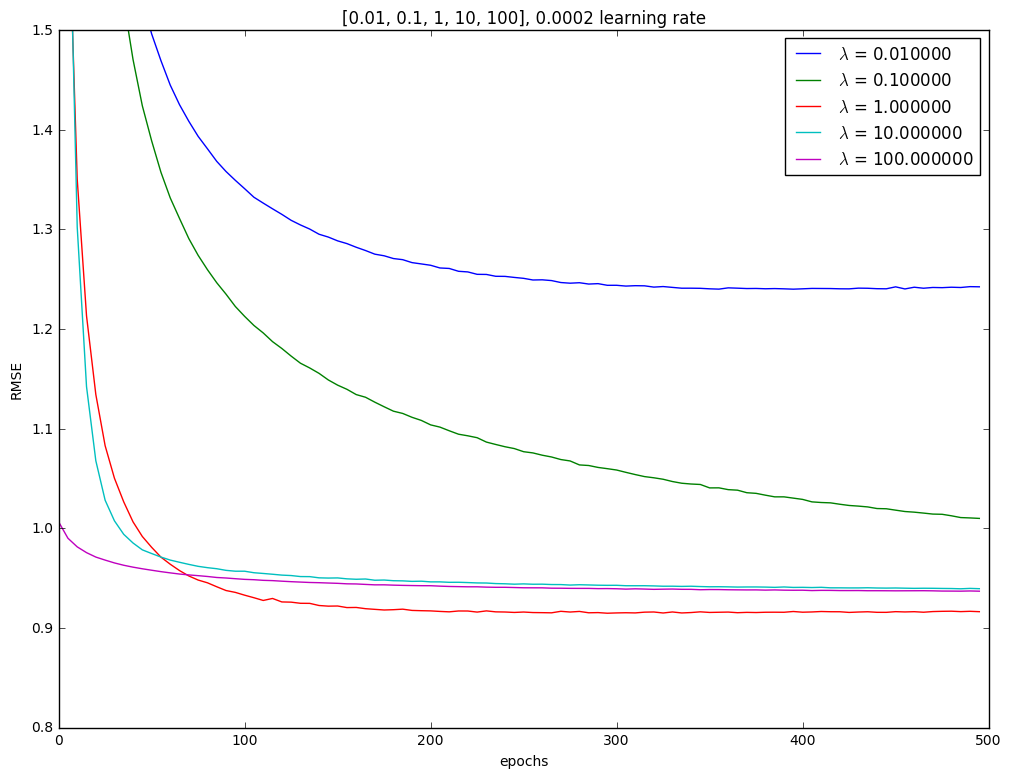

In [189]:
plt.figure(figsize=(12,9))
for lambda_reg in sorted(list(params_lambda_train.keys())):
    train_scores = params_lambda_train[lambda_reg]
    #plt.plot(np.arange(len(train_scores))*epoch_per_iter, train_scores, label=('$\lambda$ = %f train' % lambda_reg))
    test_scores = params_lambda_test[lambda_reg]
    plt.plot(np.arange(len(test_scores))*epoch_per_iter, test_scores, label=('$\lambda$ = %f' % lambda_reg))
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.ylim(0.80, 1.5)
plt.title('%s, %.4f learning rate' % (sorted(list(params_lambda_train.keys())), lr))

In [194]:
pd.DataFrame(params_lambda_train).min()

0.01      0.528125
0.10      0.718899
1.00      0.877718
10.00     0.899439
100.00    0.887249
dtype: float64

In [195]:
pd.DataFrame(params_lambda_test).min()

0.01      1.239902
0.10      1.009845
1.00      0.914687
10.00     0.939205
100.00    0.936800
dtype: float64

In [202]:
# zoom in on lambda
params_lambda_zoom = [0.5, 0.75, 1.5, 2.5, 5]
lr = 0.0005
params_lambda_zoom_train = {}
params_lambda_zoom_test = {}

In [204]:
for lambda_reg in params_lambda_zoom:
    print('lambda = ', lambda_reg)
    sgd_model = ALSmodel.ALSRecommender(n_factors=100, lr=lr, decay=0.995, method='sgd', lambda_reg=lambda_reg)
    sgd_model.prepare(train_data, test_data)
    train_scores = []
    test_scores = []
    epoch_per_iter = 5
    total_epoch = 500
    start = time.time()
    for it in range(int(total_epoch/epoch_per_iter)):
        if (it*epoch_per_iter)%20==0:
            print(it*epoch_per_iter, "th epoch.")
        sgd_model.fit(epoch_per_iter)
        train_scores.append(sgd_model.score(train_data))
        test_scores.append(sgd_model.score(test_data))
    params_lambda_zoom_train[lambda_reg] = train_scores
    params_lambda_zoom_test[lambda_reg] = test_scores
    print(time.time() - start)

lambda =  0.5
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.
340 th epoch.
360 th epoch.
380 th epoch.
400 th epoch.
420 th epoch.
440 th epoch.
460 th epoch.
480 th epoch.
1265.4976768493652
lambda =  0.75
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.
340 th epoch.
360 th epoch.
380 th epoch.
400 th epoch.
420 th epoch.
440 th epoch.
460 th epoch.
480 th epoch.
1254.276729106903
lambda =  1.5
0 th epoch.
20 th epoch.
40 th epoch.
60 th epoch.
80 th epoch.
100 th epoch.
120 th epoch.
140 th epoch.
160 th epoch.
180 th epoch.
200 th epoch.
220 th epoch.
240 th epoch.
260 th epoch.
280 th epoch.
300 th epoch.
320 th epoch.


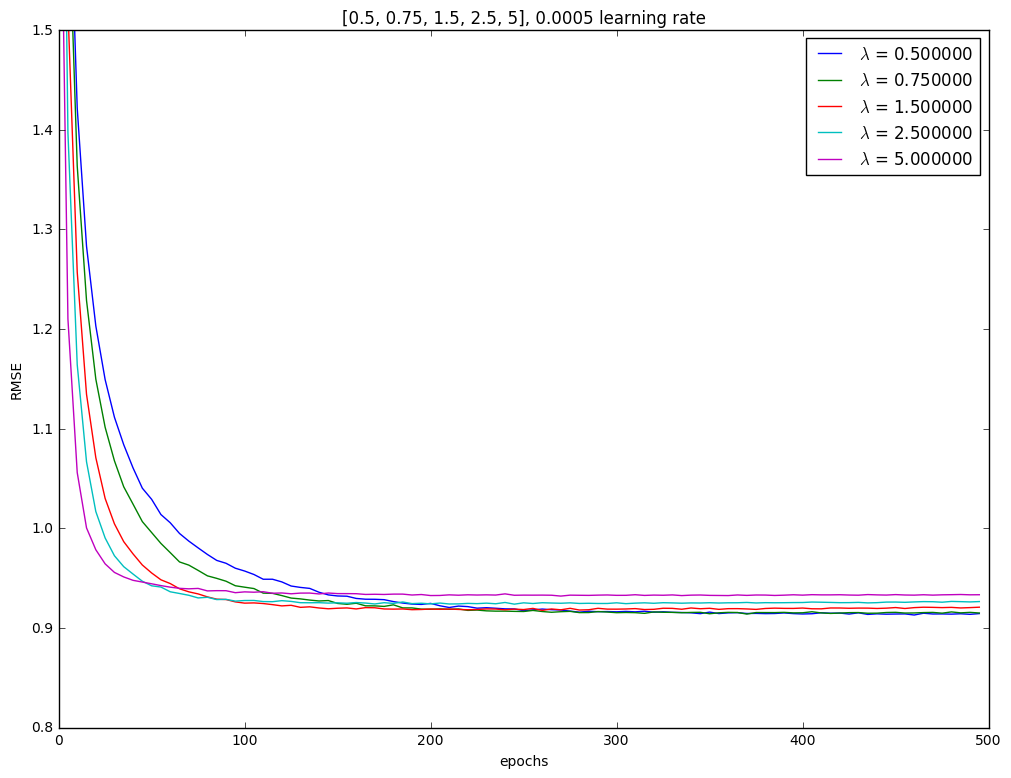

In [205]:
plt.figure(figsize=(12,9))
for lambda_reg in sorted(list(params_lambda_zoom_test.keys())):
    train_scores = params_lambda_zoom_train[lambda_reg]
    #plt.plot(np.arange(len(train_scores))*epoch_per_iter, train_scores, label=('$\lambda$ = %f train' % lambda_reg))
    test_scores = params_lambda_zoom_test[lambda_reg]
    plt.plot(np.arange(len(test_scores))*epoch_per_iter, test_scores, label=('$\lambda$ = %f' % lambda_reg))
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.ylim(0.80, 1.5)
plt.title('%s, %.4f learning rate' % (sorted(list(params_lambda_zoom_test.keys())), lr))

In [207]:
min(min(params_lambda_zoom_test.values()))

0.9318867696537001

## Best Model

In [298]:
train_data['movieId'].unique().shape

(3684,)

In [312]:
best_model = ALSmodel.ALSRecommender(n_factors=100, lr=0.0005, decay=0.995, method='sgd', lambda_reg=1)
best_model.prepare(train_data, test_data)
start = time.time()
best_model.fit(500)
print(time.time()-start)

907.2204520702362


In [313]:
best_model.score(train_data)

0.88094544582765555

In [314]:
best_model.score(test_data)

0.91732940718802258

## Movie Vector Visualizations

inspired by: https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf

In [315]:
movies = pd.read_csv('data/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [378]:
top20id = train_data.groupby('movieId').count().sort_values('userId',ascending=False).head(20).index
top20idx = [best_model.item2idx[x] for x in list(top20id)]
top20movies = [movies[movies['movieId']==movieId]['title'].values[0].split('(')[0].strip() for movieId in top20id]
top20movies

['Forrest Gump',
 'Pulp Fiction',
 'Shawshank Redemption, The',
 'Silence of the Lambs, The',
 'Star Wars: Episode IV - A New Hope',
 'Jurassic Park',
 'Matrix, The',
 'Toy Story',
 "Schindler's List",
 'Terminator 2: Judgment Day',
 'Star Wars: Episode V - The Empire Strikes Back',
 'Braveheart',
 'Back to the Future',
 'Fargo',
 'Star Wars: Episode VI - Return of the Jedi',
 'American Beauty',
 'Fugitive, The',
 'Raiders of the Lost Ark',
 'Independence Day',
 'Aladdin']

In [ ]:
movie_titles = [movies[movies['movieId']==movieId]['title'].values[0].split('(')[0].strip() for movieId in sgd_model.items[:100]]

In [399]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca2 = pca.fit_transform(best_model.item_vec.T)

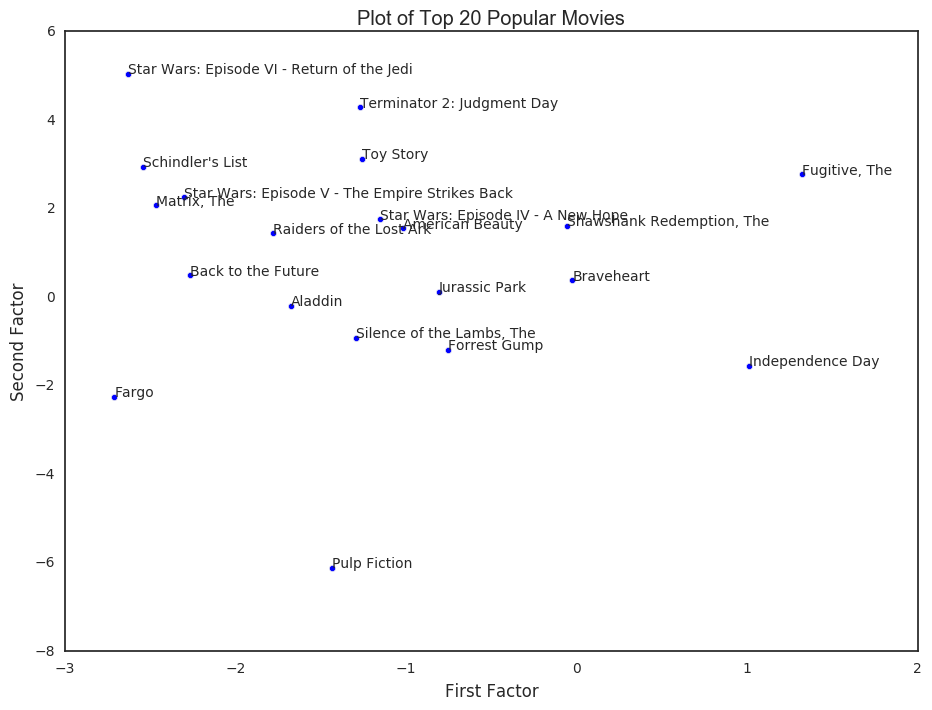

In [427]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('Set3')
plt.figure(figsize=(11,8))
x, y = (pca2[top20idx, 0]+3.3)*100, pca2[top20idx, 1]*3000
plt.scatter(x, y)
plt.xlabel('First Factor')
plt.ylabel('Second Factor')
plt.title('Plot of Top 20 Popular Movies')
for i, txt in enumerate(top20movies[:20]):
    plt.annotate(txt, (x[i],y[i]))

In [146]:
from sklearn.manifold import TSNE

In [215]:
tsne = TSNE()
tsne_out = tsne.fit_transform(sgd_model.item_vec.T)

In [181]:
movies.head(30).sort_values(by='title')

,movieId,title,genres
18,19,Ace Ventura: When Nature Calls (1995),Comedy
10,11,"American President, The (1995)",Comedy|Drama|Romance
22,23,Assassins (1995),Action|Crime|Thriller
12,13,Balto (1995),Adventure|Animation|Children
15,16,Casino (1995),Crime|Drama
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
4,5,Father of the Bride Part II (1995),Comedy


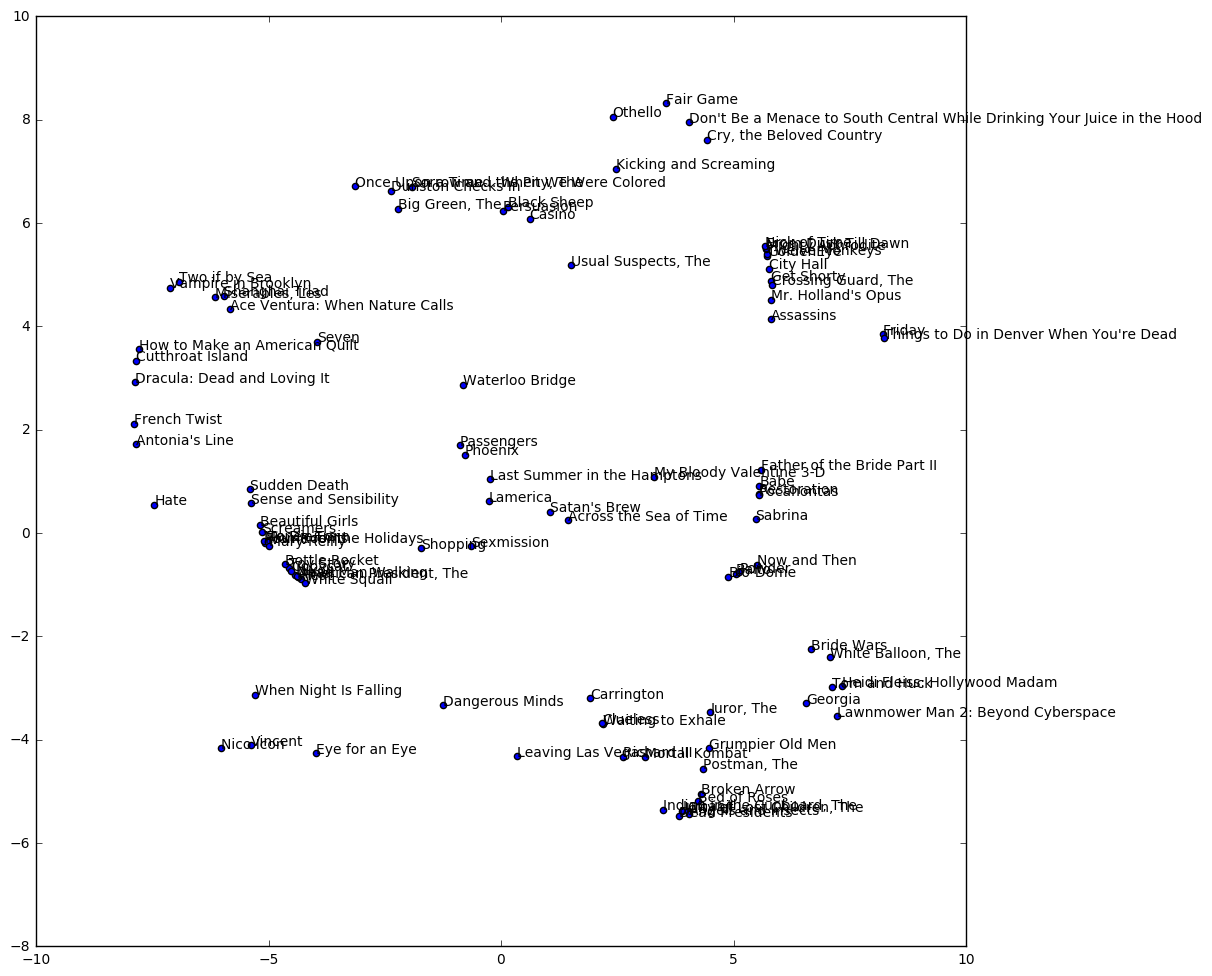

In [217]:
plt.figure(figsize=(12,12))

x, y = tsne_out[:100,0], tsne_out[:100,1]
plt.scatter(x, y)

for i, txt in enumerate(movie_titles[:100]):
    plt.annotate(txt, (x[i],y[i]))

In [435]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(len(tableau20)):
    r,g,b = tableau20[i]
    tableau20[i] = (r/255., g/255., b/255.)

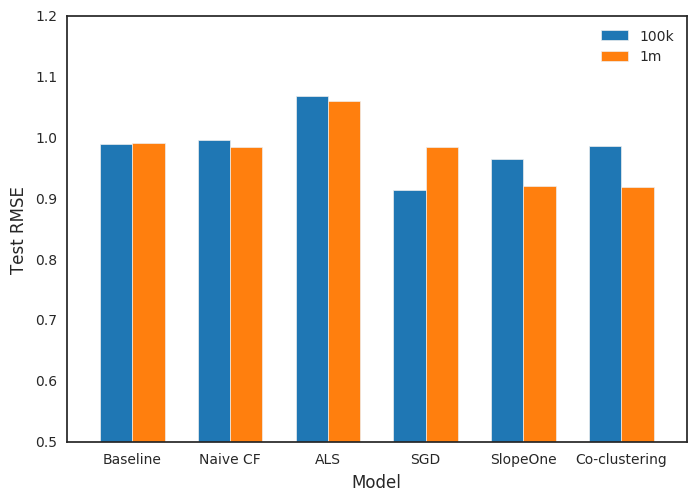

In [470]:
from pylab import *
models = ['Baseline', 'Naive CF', 'ALS', 'SGD', 'SlopeOne', 'Co-clustering']
results100k = [0.9906, 0.9957 ,1.0687 ,0.9147 ,0.9658 ,0.9863]
results1m = [0.9917, 0.9851, 1.0612, 0.9845, 0.9217, 0.9193]
fig, ax = plt.subplots()
bar(np.arange(6)+1,results100k, color=tableau20[0], width=0.33, label='100k')
bar(np.arange(6)+1+0.33, results1m, color=tableau20[2], width=0.33, label='1m')
ax.set_xticks(np.arange(6) + 1 + 0.66 / 2)
ax.set_xticklabels(models)
plt.xlim(0.66,7)
plt.ylim(0.5,1.2)
plt.xlabel('Model')
plt.ylabel('Test RMSE')
plt.legend();